<a href="https://colab.research.google.com/github/sadi-qa/INSE6220_Final_Project/blob/main/INSE6220_Final_Project_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1 – Setup and Imports

In this step, we import all required Python libraries for data handling, visualization, Principal Component Analysis (PCA), and machine learning. We also set a consistent plot style for all figures.


In [1]:
# Step 1 – Setup and Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# Plot style
sns.set(style="whitegrid", context="notebook")

### Step 2 – Load the Dataset and Inspect Structure

We load the UCI Red Wine Quality dataset, which contains 1,599 red wines with eleven physicochemical attributes and a quality score between 0 and 10. We then inspect the basic structure, data types, and summary statistics to understand the dataset before any preprocessing.


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("Shape of the dataset (rows, columns):", df.shape)
print("\nData types and non-null counts:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())


Shape of the dataset (rows, columns): (1599, 12)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Summary statistics:
       fixed acidi

### Step 3 – Create Binary Target and Define Features

To simplify the prediction task, we convert the original quality score into a binary label `good_quality`, where wines with quality ≥ 6 are labeled as 1 (good) and the rest as 0 (not good). We then define the feature matrix `X` (physicochemical attributes) and the target vector `y` (binary quality).


In [3]:
# Binary label: 1 if quality >= 6, else 0
df["good_quality"] = (df["quality"] >= 6).astype(int)

print("Value counts for original quality scores:")
print(df["quality"].value_counts().sort_index())

print("\nValue counts for binary label good_quality (0 = not good, 1 = good):")
print(df["good_quality"].value_counts())

# Features (X) and target (y)
X = df.drop(columns=["quality", "good_quality"])
y = df["good_quality"]

print("\nFeature columns:")
print(list(X.columns))

# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())


Value counts for original quality scores:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Value counts for binary label good_quality (0 = not good, 1 = good):
good_quality
1    855
0    744
Name: count, dtype: int64

Feature columns:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good_quality            0
dtype: int64


### Step 4 – Exploratory Data Analysis: Distributions and Correlation

We visualize the distribution of the original quality scores and the binary label. Then, we plot histograms for all physicochemical features to inspect their spread and skewness. Finally, we compute and visualize the correlation matrix across all numeric variables to identify multicollinearity and relationships between features and quality.


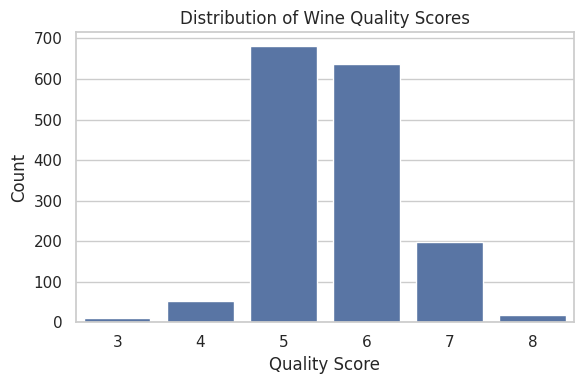

In [15]:
# Step 4.1 – Distribution of original quality scores

plt.figure(figsize=(6, 4))
sns.countplot(x="quality", data=df)
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




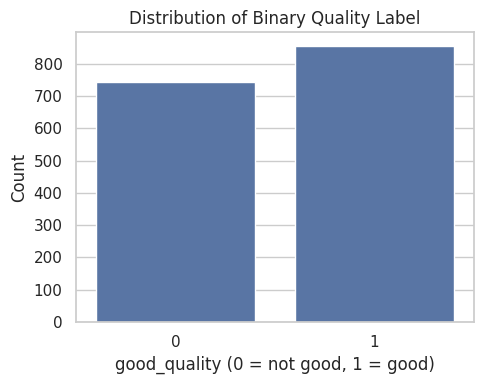

In [16]:
# Step 4.2 – Distribution of binary quality label

plt.figure(figsize=(5, 4))
sns.countplot(x="good_quality", data=df)
plt.title("Distribution of Binary Quality Label")
plt.xlabel("good_quality (0 = not good, 1 = good)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

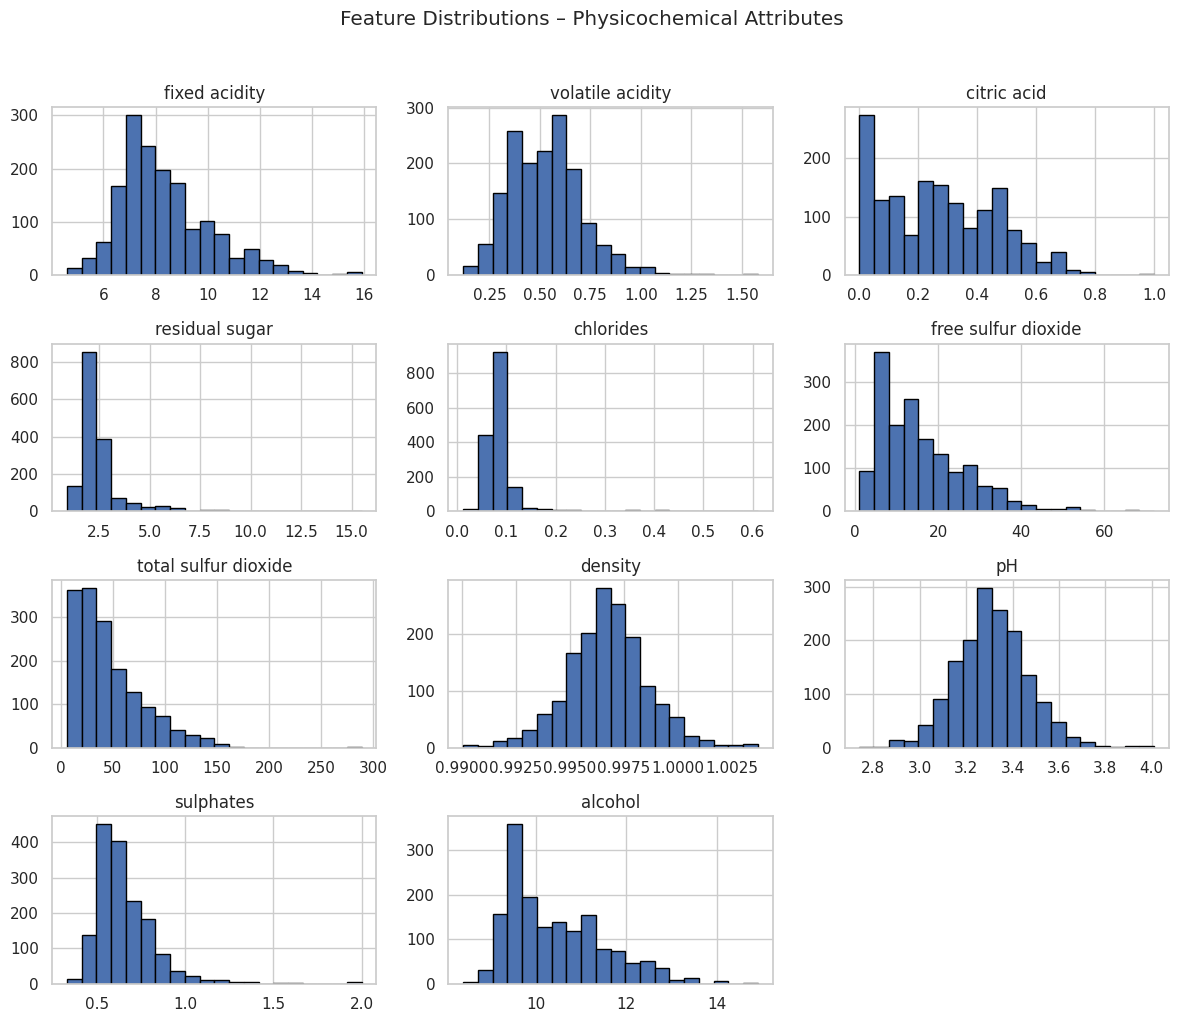

In [17]:
# Step 4.3 – Histograms of all physicochemical features

X.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions – Physicochemical Attributes", y=1.02)
plt.tight_layout()
plt.show()




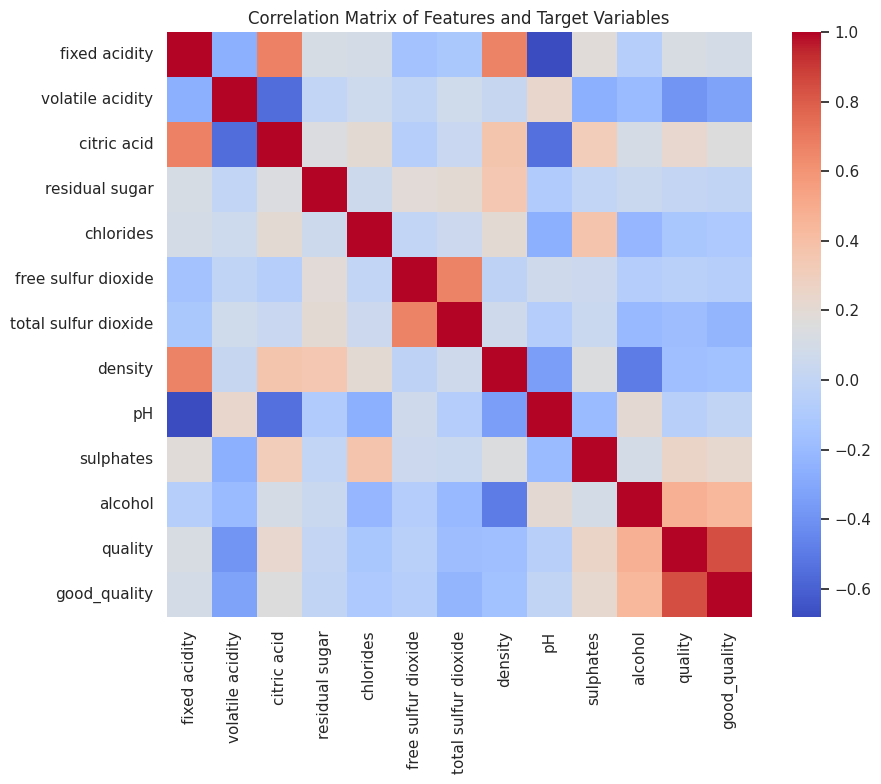

In [18]:
# Step 4.4 – Correlation matrix

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)  # numeric_only avoids warnings in newer pandas
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features and Target Variables")
plt.tight_layout()
plt.show()

### Step 5 – Feature Standardization

Principal Component Analysis (PCA) and distance-based algorithms such as k-NN and Random Forest typically perform better when features are on a comparable scale. We standardize all physicochemical attributes to zero mean and unit variance using `StandardScaler`, creating the standardized feature matrix `X_scaled_df`.


In [6]:
# Step 5 – Standardize Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of standardized features:")
print(X_scaled_df.head())


First 5 rows of standardized features:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -

### Step 6 – PCA: Covariance Matrix and Eigen-Decomposition

We apply PCA to the standardized feature matrix. First, we compute the covariance matrix and perform eigen-decomposition to obtain eigenvalues (explained variance per component) and eigenvectors (principal directions). This manual approach helps understand how PCA works mathematically.


In [7]:
# Step 6 – PCA: Covariance Matrix and Eigen-Decomposition

# Covariance matrix of standardized features
cov_matrix = np.cov(X_scaled_df.T)
print("Covariance matrix shape:", cov_matrix.shape)

# Eigen-decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order of variance
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values_sorted = eigen_values[sorted_idx]
eigen_vectors_sorted = eigen_vectors[:, sorted_idx]

# Explained variance and cumulative explained variance
total_var = np.sum(eigen_values_sorted)
explained_variance = eigen_values_sorted / total_var
cum_explained_variance = np.cumsum(explained_variance)

print("\nEigenvalues (sorted):")
print(eigen_values_sorted)

print("\nExplained variance ratio (sorted):")
print(explained_variance)

print("\nCumulative explained variance ratio:")
print(cum_explained_variance)


Covariance matrix shape: (11, 11)

Eigenvalues (sorted):
[3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.66002104
 0.58415655 0.42322138 0.34485779 0.18144664 0.05959558]

Explained variance ratio (sorted):
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]

Cumulative explained variance ratio:
[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


### Step 7 – PCA Plots: Scree, Cumulative Variance, Loadings, and PC Scatter

To interpret PCA, we plot:
- A scree plot showing the variance explained by each principal component.
- A cumulative variance plot to decide how many components are sufficient.
- Loadings for PC1 and PC2, showing how each original feature contributes to those components.
- A scatter plot of samples in the PC1–PC2 space, coloured by the binary quality label.


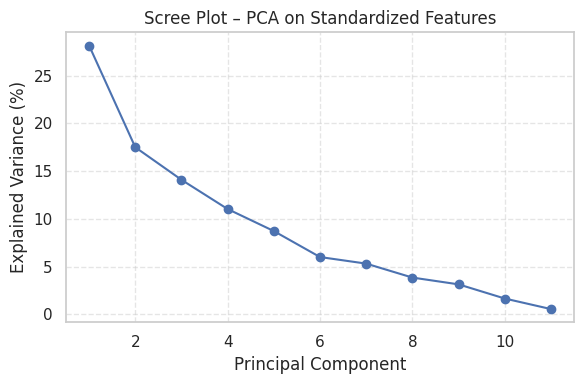

In [19]:
# Step 7.1 – Scree plot and cumulative explained variance

num_components = len(eigen_values_sorted)

# Scree plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_components + 1), explained_variance * 100, marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Scree Plot – PCA on Standardized Features")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




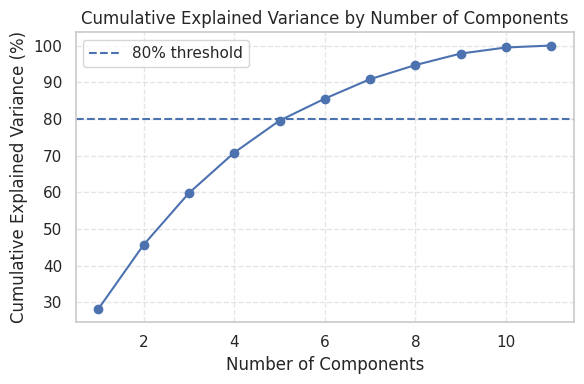

In [20]:
# Cumulative explained variance plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_components + 1), cum_explained_variance * 100, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Cumulative Explained Variance by Number of Components")
plt.axhline(80, linestyle="--", label="80% threshold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

First 5 rows of principal component scores (first 5 PCs):
        PC1       PC2       PC3       PC4       PC5
0 -1.619530  0.450950 -1.774454  0.043740  0.067014
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149
4 -1.619530  0.450950 -1.774454  0.043740  0.067014


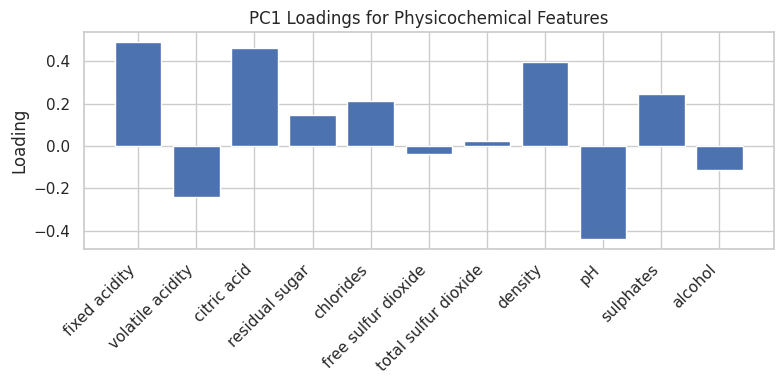

In [23]:
# Step 7.2 – Principal component scores (projection into PC space)

Z = np.dot(X_scaled_df, eigen_vectors_sorted)
PC_df = pd.DataFrame(Z, columns=[f"PC{i+1}" for i in range(Z.shape[1])])

print("First 5 rows of principal component scores (first 5 PCs):")
print(PC_df.iloc[:, :5].head())

# Step 7.3 – Loadings for PC1 and PC2

loadings_PC1 = eigen_vectors_sorted[:, 0]
loadings_PC2 = eigen_vectors_sorted[:, 1]

# PC1 loadings
plt.figure(figsize=(8, 4))
plt.bar(X.columns, loadings_PC1)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Loading")
plt.title("PC1 Loadings for Physicochemical Features")
plt.tight_layout()
plt.show()






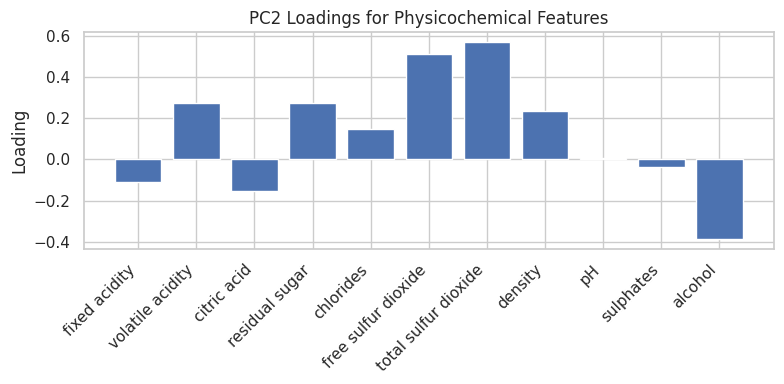

In [24]:
# PC2 loadings
plt.figure(figsize=(8, 4))
plt.bar(X.columns, loadings_PC2)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Loading")
plt.title("PC2 Loadings for Physicochemical Features")
plt.tight_layout()
plt.show()

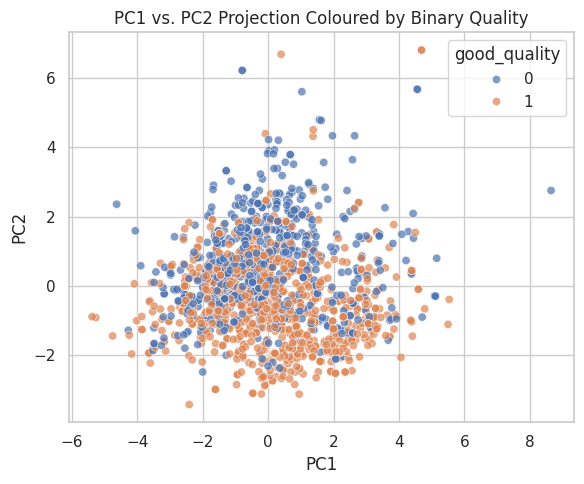

In [22]:
# Step 7.4 – PC1 vs PC2 scatter plot coloured by quality label

plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=PC_df["PC1"],
    y=PC_df["PC2"],
    hue=y,
    alpha=0.7
)
plt.title("PC1 vs. PC2 Projection Coloured by Binary Quality")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="good_quality")
plt.tight_layout()
plt.show()

### Step 8 – sklearn PCA (2 Components) for Machine Learning

For the machine learning experiments, we create a two-dimensional PCA representation using scikit-learn’s `PCA`. The first two components capture a substantial share of the variance and allow us to compare model performance on reduced versus full feature spaces.


In [10]:
# Step 8 – sklearn PCA (2 Components) for Machine Learning

pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaled_df)

print("Shape of PCA(2) feature matrix:", X_pca_2.shape)
print("Explained variance ratio (2 components):", pca.explained_variance_ratio_)
print("Cumulative explained variance (2 components):", np.sum(pca.explained_variance_ratio_))


Shape of PCA(2) feature matrix: (1599, 2)
Explained variance ratio (2 components): [0.28173931 0.1750827 ]
Cumulative explained variance (2 components): 0.45682201184294036


### Step 9 – Train–Test Split

We split the data into training and test sets using a 70/30 stratified split to preserve the class proportions in both sets. We create two versions of the split: one for the original standardized features and one for the PCA(2) features, while keeping the same labels.


In [11]:
# Step 9 – Train–Test Split for Original and PCA Features

X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.3,
    random_state=123,
    stratify=y
)

X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca_2, y,
    test_size=0.3,
    random_state=123,
    stratify=y
)

print("Train shape (original features):", X_train_orig.shape)
print("Test shape  (original features):", X_test_orig.shape)

print("Train shape (PCA(2) features):", X_train_pca.shape)
print("Test shape  (PCA(2) features):", X_test_pca.shape)


Train shape (original features): (1119, 11)
Test shape  (original features): (480, 11)
Train shape (PCA(2) features): (1119, 2)
Test shape  (PCA(2) features): (480, 2)


### Step 10 – Random Forest Classification: Original vs PCA Features

We train a Random Forest classifier on:
- the full set of standardized physicochemical features, and
- the two-dimensional PCA representation.

For each setting, we compute accuracy and F1-score on the test set. We then visualize the confusion matrix for the best-performing model and compare ROC curves for both feature representations.


In [12]:
# Step 10.1 – Helper function to train and evaluate Random Forest

def evaluate_rf_model(X_tr, X_te, y_tr, y_te, description="Model"):
    """
    Fits a RandomForestClassifier and prints evaluation metrics.
    Returns: model, y_pred, y_prob, acc, f1
    """
    rf = RandomForestClassifier(
        n_estimators=200,
        random_state=123,
        n_jobs=-1
    )
    rf.fit(X_tr, y_tr)
    y_pred = rf.predict(X_te)
    y_prob = rf.predict_proba(X_te)[:, 1]

    acc = accuracy_score(y_te, y_pred)
    f1 = f1_score(y_te, y_pred)

    print(f"\n=== {description} ===")
    print("Accuracy :", round(acc, 4))
    print("F1-score :", round(f1, 4))
    print("\nClassification report:")
    print(classification_report(y_te, y_pred, digits=4))

    return rf, y_pred, y_prob, acc, f1

# Random Forest on original standardized features
rf_orig, y_pred_orig, y_prob_orig, acc_orig, f1_orig = evaluate_rf_model(
    X_train_orig, X_test_orig, y_train, y_test,
    description="Random Forest (Original Standardized Features)"
)

# Random Forest on PCA(2) features
rf_pca, y_pred_pca, y_prob_pca, acc_pca, f1_pca = evaluate_rf_model(
    X_train_pca, X_test_pca, y_train, y_test,
    description="Random Forest (PCA(2) Features)"
)



=== Random Forest (Original Standardized Features) ===
Accuracy : 0.8187
F1-score : 0.8311

Classification report:
              precision    recall  f1-score   support

           0     0.8063    0.8027    0.8045       223
           1     0.8295    0.8327    0.8311       257

    accuracy                         0.8187       480
   macro avg     0.8179    0.8177    0.8178       480
weighted avg     0.8187    0.8187    0.8187       480


=== Random Forest (PCA(2) Features) ===
Accuracy : 0.7042
F1-score : 0.7194

Classification report:
              precision    recall  f1-score   support

           0     0.6753    0.6996    0.6872       223
           1     0.7309    0.7082    0.7194       257

    accuracy                         0.7042       480
   macro avg     0.7031    0.7039    0.7033       480
weighted avg     0.7051    0.7042    0.7044       480



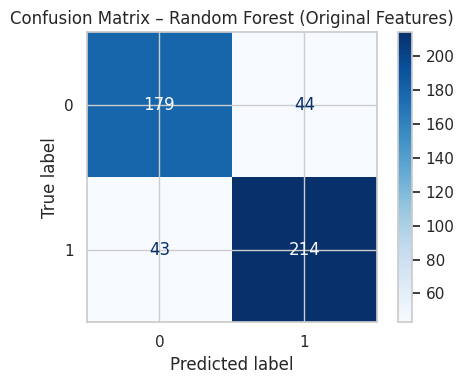

In [25]:
# Step 10.2 – Confusion matrix for RF on original features

plt.figure(figsize=(5, 4))
cm_orig = confusion_matrix(y_test, y_pred_orig)
disp_orig = ConfusionMatrixDisplay(confusion_matrix=cm_orig, display_labels=[0, 1])
disp_orig.plot(values_format="d", cmap="Blues", ax=plt.gca())
plt.title("Confusion Matrix – Random Forest (Original Features)")
plt.tight_layout()
plt.show()




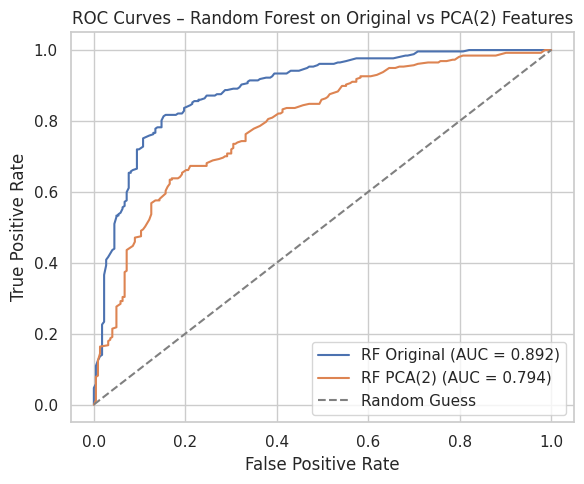

In [26]:
# Step 10.3 – ROC curves for original vs PCA-based models

fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob_orig)
roc_auc_orig = auc(fpr_orig, tpr_orig)

fpr_pca, tpr_pca, _ = roc_curve(y_test, y_prob_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

plt.figure(figsize=(6, 5))
plt.plot(fpr_orig, tpr_orig, label=f"RF Original (AUC = {roc_auc_orig:.3f})")
plt.plot(fpr_pca, tpr_pca, label=f"RF PCA(2) (AUC = {roc_auc_pca:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Random Forest on Original vs PCA(2) Features")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Summary of Random Forest performance:
   Features  Accuracy  F1-score
0  Original  0.818750  0.831068
1    PCA(2)  0.704167  0.719368


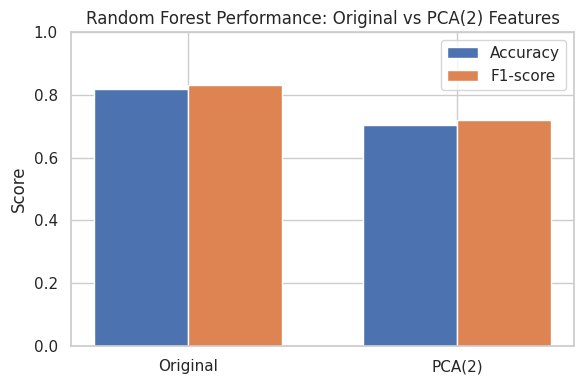

In [14]:
# Step 10.4 – Summary comparison table and bar plot

summary_df = pd.DataFrame({
    "Features": ["Original", "PCA(2)"],
    "Accuracy": [acc_orig, acc_pca],
    "F1-score": [f1_orig, f1_pca]
})

print("\nSummary of Random Forest performance:")
print(summary_df)

plt.figure(figsize=(6, 4))
x = np.arange(len(summary_df))
width = 0.35

plt.bar(x - width/2, summary_df["Accuracy"], width, label="Accuracy")
plt.bar(x + width/2, summary_df["F1-score"], width, label="F1-score")

plt.xticks(x, summary_df["Features"])
plt.ylim(0, 1.0)
plt.ylabel("Score")
plt.title("Random Forest Performance: Original vs PCA(2) Features")
plt.legend()
plt.tight_layout()
plt.show()
